<span style="font-family:Helvetica ;font-size: 14px; line-height:2.2">

# Linear Regression from Scratch with NumPy
---

Welcome to the first post of the **Implementing Machine Learning Algorithms with NumPy** series in which I'll try to show how one can implement some machine learning algorithms with `numpy` package only. 

Of course, we will use other useful packages such as `matplotlib`, ` seaborn` and etc. However, the use of other packages may only be limited to data visualization, data manipulation and/or loading datasets (e.g. `sklearn.datasets`) such that we won't take any shortcuts while writing the actual code for machine learning models.

To sum it up, we will be implementing machine learning algorithms from scratch! Isn't that exciting and little bit overwhelming at the same time? Did I mention that it is super fun as well? The first algorithm that we will tackle is linear regression. Since it is the "hello world" algorithm of the machine learning universe, it will be pretty easy to implement it with NumPy. Let's start right away!

## Linear Regression Intuition
---


Before we write the code for implementation of linear regression, first we need to understand what linear regression is. There are many useful resources out there that makes it quite easy to understand the concept behind regression and particularly linear regression so, I won't be going into much detail here. 

Linear regression is used to make some sense of the data we have at hand by unearthing the relation between target values and features of the data. When we know this relation, we can make predictions about the data that we haven't seen before, in other words, we can infer the target value from feature values. Let's exemplify this: 

Suppose we want to understand how a company X decides what to pay to its employees. There may be so many factors that go into that decision so, we go around and ask most of the employees who work there. After a lot of prying and sneaking around, it turns out that, some of them earn a lot because they have been working at the company X for quite some time, some of them earn higher than most simply because they get along really well with the boss and some earn higher because of their qualifications and talent. These three indicators seem to be the major ones so we'll be using these three only. Now, with the information we have gathered, we want to understand the underlying relation between these factors and the salary that is paid to the employees currently. We come up with this oversimpflied equation:

</span>

<span style="font-family:Helvetica ;font-size: 16px; line-height:3.2">
    
**SALARY** = (? x _**Qualifications**_) + (? x **_Length of Service_**) + (? x _**Buttering up the Boss**_)
    
</span>

<span style="font-family:Helvetica ;font-size: 14px; line-height:2.2">
    
We can see from the equation above that the salary is affected by 3 attributes. These attributes, also called **features**, affect the salary according to their own weight which is depicted in the equation as question marks simply because we don't actually know what these weights are. 

Now, let's imagine what would happen if we know these weights exactly. Then, if we have an employee whose salary we don't know, we can use the features (qualifications, length of service etc.) of the employee to predict the employee's salary, that is, we would understand how these features and the target value (salary) are related. 

Turns out, linear regression is used to do exactly that! It is used to get a good estimate of these weights so that they can be used to predict the target value of unseen data. In machine learning world, these weights are often called **parameters**, hence from now on, we'll adopt that term here as well. 


## Gradient Descent Algorithm
---


Now that we know **what** linear regression is practically, we can come to the **how** part. How does this algorithm work? How can we figure out these parameters for linear regression? In machine learning, there is another famous algorithm called **gradient descent** that is widely used, not only for estimating the parameters for linear regression but for other optimization problems as well. In gradient descent algorithm, parameters of the model is changed iteratively at each step starting with the initial values of the parameters. 

To remind us once more, parameters (weights) are the numerical values that determine how much each feature affects the target value. We want to know these parameter values exactly, but in real life this is not possible because there may be  other features (hence, parameters of those features as well) affecting the target value. However, we want them to predict the target value as close as possible to the actual value. Since, the question marks in the above equation represent the parameter values, we can replace them with values like this:

</span>

<span style="font-family:Helvetica ;font-size: 16px; line-height:3.2">

**SALARY** = (1000 x _**Qualifications**_) + (200 x **_Length of Service_**) + (500 x _**Buttering up the Boss**_)

</span>

<span style="font-family:Helvetica ;font-size: 14px; line-height:2.2">

Here, it is obvious that qualifications feature affects salary more than the other features, because its parameter value is higher than the rest. Keep in mind that we have chosen these parameter values intuitively and we will be using them as our initial parameter values, yet these initial values will change at every step of the algorithm towards their optimal values.

Going along with our analogy, suppose we have an initial estimate for the parameters of these features and we went around and asked these questions to the first employee we could find:

 * For how long have you been working here?
 * What are your qualifications for your position?
 * How do you get along with your boss? (Does your boss seem to like or dislike you?) 

For the first question, we told the employee that we would accept an answer in years (1 year, 2 years, 5 years etc.). For the second question, we told the employee that the answer would be any number from 1 to 10 (1 being the least qualified and 10 the most). For the last question, the answer would be a number from -5 to 5. Here, minus represents the negativity of the relationship between the employee and the boss. Therefore, -5 means that the boss quite dislikes the employee, 0 could mean that the boss doesn't even know the employee and/or there is no interaction between the two and +5 means that two of them get along just great. 

When we asked the employee these questions, these were the answers we got:

* I've have been working here for 10 years.
* I can honestly say that I'm overqualified for this job. So I would give it a 9.
* My boss seems to hate me. Whenever I'm around I can see the hatred in his eyes. So I would give it a -4.

Remember that we want to predict the salary based the parameters we have chosen and the answers we've got from the employee. After predicting what the salary would be based on only these answers, we ask the employee what her actual salary is. The difference between the predicted and actual value determines how successful our estimates for these parameters (weights) are. Gradient descent algorithm's job is to make this difference (predicted - actual) as small as possible. Let's go ahead and call this difference **error**, since it represents how much off the actual value is from the predicted value. Now, let's plug the numbers we get from the first employee's answers into our equation:

</span>

<span style="font-family:Helvetica ;font-size: 16px; line-height:3.2">

**SALARY** = (1000 x 10) + (200 x 9) + (500 x -4)

</span>

<span style="font-family:Helvetica ;font-size: 14px; line-height:2.2">

Hence, this shows that our prediction for the salary is:

</span>

<span style="font-family:Helvetica ;font-size: 16px; line-height:3.2">

**SALARY**<sub>predicted</sub> = 12800

</span>

<span style="font-family:Helvetica ;font-size: 14px; line-height:2.5">

Now, after getting the actual salary from the employee, we calculate the error between the actual and predicted value:

</span>

<span style="font-family:Helvetica ;font-size: 16px; line-height:2.2">

**SALARY**<sub>actual</sub> = 9800

</span>

<span style="font-family:Helvetica ;font-size: 16px; line-height:3.2">

**Error** = **SALARY**<sub>predicted</sub> - **SALARY**<sub>actual</sub> = 12800 - 9800 = 3000

</span>

<span style="font-family:Helvetica ;font-size: 14px; line-height:2.2">

We see that our error is **3000**, we want to make this error as small as possible by tweaking the parameter values appropriately. But how do we do that? How do we decide what is the correct way of changing the parameter values? Obviously, we can make guesses intuitively and change the parameter values (increase or decrease) to make the error small enough. However, this won't be practical if we have one hundred features and not only three. One hundred features mean one hundred parameter values, remember? Obviously, we have to find a better way than this.

Moreover, there is another factor to consider. This error cannot represent only one employee, in other words, we cannot only change the parameter values for one employee since we want this model to be representative for all the employees who work at company X. We have to get the answer from each employee and plug those values into the equation, find the error and change the parameters accordingly. 

The error function that we have used here (Error = Predicted - Actual) is one of the most basic functions in machine learning which has its certain limitations. Therefore, while implemeting linear regression, we will use a more sophisticated version called **sum of squared errors (SSE)**, which is simply the the sum of square differences between the actual and predicted values.

</span>

<span style="font-family:Helvetica ;font-size: 14px; line-height:2.2">
    
Now, a quick change of notation is in order. The term **cost** is often used a lot instead of the term erro' and we'll use that here as well, since it costs us to miss the actual value by an amount of predicted-actual. If predicted value was equal to the actual value, the cost would be zero. Therefore, a cost function is used as a measure of how wrong the model is in terms of its ability to estimate the relationship between feature values and target values.

After establishing which cost function to use, we can now move on. The whole point of gradient descent algorithm is to minimize the cost function. When we minimize the cost function, we are actually ensuring the possible lowest error while increasing the accuracy of our model. We go over our dataset iteratively while updating the parameters at each step. Back to our analogy, remember that we had three parameters (qualifications, length of service, buttering up the boss) that we wanted to change in the direction that minimized the cost function. So checking each data point in our dataset basically means asking each employee who works at company X those 3 questions we convised, using plugging the values we extract from answers into the cost function and deciding into which direction the next step should be taken to minimize the cost function.

Now, how do we decide which direction we should move towards to make the total cost lower? Calculus comes to our help here. When we want to minimize a function we take the derivative of the function with respect to a variable and use that derivative to decide which direction to go. In our analogy, the parameters that we have chosen are actually the **variables** of our cost function because the cost function varies as each parameter varies (variable, duh). We have to take the derivative with respect to each parameter and update the parameters using those derivative values. In the picture below, we can see the graph of the cost function against just one parameter (Length of Service). Now when we calculate the partial derivative of the cost function with respect to this parameter only, we get the direction we need to move towards for this parameter, in order to reach the local minima whose slope equals to 0.

</span>

<span style="font-family:Helvetica ;font-size: 14px; line-height:1.2">

<img src="img/cost_function.png" width=400 height=200 > <br> <br>

</span>

<span style="font-family:Helvetica ;font-size: 14px; line-height:2.2">

When we take the derivative with respect to each parameter and find the direction we need to move towards, we update each parameter simultaneously:

</span>

<span style="font-family:Helvetica ;font-size: 16px; line-height:3.2">

**Length of Service**<sub>updated</sub> = **Length of Service**<sub>old</sub> - (*Learning Rate* x **Partial Derivative w.r.t. Length of Service**)

</span>

<span style="font-family:Helvetica ;font-size: 14px; line-height:2.2">

This update rule is applied to all of the parameters using their partial derivatives correspondingly. When we apply update rule once, it means one iteration. Here, **learning rate**, also called learning step, is the amount that the parameters are updated during learning. Learning rate is a configurable hyperparameter, often chosen between 0.0 and 1.0, that defines the rate or speed at which the model learns. If it's high, the model learns quickly, however it's too high, we might miss the optimal value during learning because we might have taken a really big step. If the learning rate is too low, then the model will take a lot of time to converge to the lowest cost function value. Obviously, tuning this hyperparameter is of great importance in machine learning.

So one iteration means asking each employee those three questions only once (or going over the dataset once) and updating the parameter values accordingly. After iterating the dataset many times, iterating stops when we reach a point where the cost is low enough for us to decide that we can stop the algorithm and use the parameter values that were updated up until now. Then, we can use those **optimized** values to predict new target values for new feature values. What do we mean by optimized here? Well, now we have found parameter values for our three features, so that they can predict new target values with lowest possible error. Hence, we optimized those parameters in our model. This is where learning of the machine learning happens indeed. We **learn** the parameters that minimizes our cost function.

</span>

<span style="font-family:Helvetica ;font-size: 14px; line-height:2.2">
    
## Linear Regression Implementation (Finally!)
---

In [83]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

<span style="font-family:Helvetica ;font-size: 14px; line-height:2.2">

First things first, we start by importing necessary libraries to help us along the way. As I have mentioned before, we won't be using any packages that will give us already implemented algorithm models such as `sklearn.linear_model` since it won't help us grasp what is the underlying principles of implementing an algorithm because it is an out-of-the-box (hence, ready-made) solution. We want to do it the hard way, not the easy way.

Moreover, do notice that we can use `sklearn` package (or other packages) to make use of its useful functions, such as loading a dataset, as long as we don't use its already implemented algorithm models.

We will be using:
* `numpy` (obviously) to do all of the vectorized numerical computations on the dataset including the implementation of the algorithm,
* `matplotlib` to plot graphs for better understanding the problem at hand with some visual aid,
*` sklearn.datasets` to load some toy datasets to play around with our written code.


In [84]:
dataset = load_boston()

X = dataset.data
y = dataset.target[:,np.newaxis]

print("Total samples in our dataset is: {}".format(X.shape[0]))

Total samples in our dataset is: 506


<span style="font-family:Helvetica ;font-size: 14px; line-height:2.2">

Now, it's time to load the dataset we will be using throughout this post. The `sklearn.datasets` package offers some toy datasets to illustrate the behaviour of some algorithms and we will be using `load_boston()`function to return a regression dataset. Here, `dataset.data` represents the feature samples and `dataset.target` returns the target values, also called labels. 

It is important to note that, when we are loading the target values, we are adding a new dimension to the data (`dataset.target[:,np.newaxis]`), so that we can use the data as a column vector. Remember, linear algebra makes a distinction between row vectors and column vectors. However, in NumPy there are only n-dimensional arrays and no concept for row and column vectors, per se. We can use arrays of shape `(n, 1)` to imitate column vectors and `(1, n)` for row vectors. Ergo, we can use our target values of shape `(n, )` as a column vector of shape ` (n, 1)` by adding an axis explicitly. Luckily, we can do that with NumPy's own `newaxis` function which is used to increase the dimension of an array by one more dimension, when used once.

In [85]:
def compute_cost(X, y, params):
    n_samples = len(y)
    h = X @ params
    return (1/(2*n_samples))*np.sum((h-y)**2)

<span style="font-family:Helvetica ;font-size: 14px; line-height:2.2">

We have chosen the sum of squared errors (SSE) as our cost function, so we'll implement it here. h denotes our hypothesis function which is just a candidate function for our mapping from inputs (X) to outputs (y). When we take the inner product of our features with the parameters (`X @ params`), we are explicitly stating that we will be using linear regression for our hypthesis from a broad list of other machine learning algorithms, that is, we have decided that the relation between feature and target values is best described by the linear regression. 

In [86]:
def gradient_descent(X, y, params, learning_rate, n_iters):
    n_samples = len(y)
    J_history = np.zeros((n_iters,1))

    for i in range(n_iters):
        params = params - (learning_rate/n_samples) * X.T @ (X @ params - y) 
        J_history[i] = compute_cost(X, y, params)

    return (J_history, params)

<span style="font-family:Helvetica ;font-size: 14px; line-height:2.2">

We can now implement gradient descent algorithm. Here, `n_iters` denotes the number of iterations for the gradient descent. We want to keep the history of our costs returned by the cost function in each iteration so we use an NumPy array `J_history` for that. As for the update rule, `1/n_samples) * X.T @ (X @ params - y) ` corresponds to the partial derivative of the cost function with respect to our parameters. So, `params` holds the updated parameters values according to the update rule. 

In [87]:
n_samples = len(y)

mu = np.mean(X, 0)
sigma = np.std(X, 0)

X = (X-mu) / sigma

X = np.hstack((np.ones((n_samples,1)),X))
n_features = np.size(X,1)
params = np.zeros((n_features,1))

<span style="font-family:Helvetica ;font-size: 14px; line-height:2.2">

Before we run the gradient descent algorithm on our dataset, we normalize the data. Normalization is a technique often applied as part of data preparation in machine learning pipeline which typically means rescaling the values into a range of `[0,1]` to boost our accuracy hence lower the cost (error). Also, note that we initialize the paramaters (`params`) as zeros.

Initial cost is:  296.0734584980237 

Optimal parameters are: 
 [[22.53279993]
 [-0.83980839]
 [ 0.92612237]
 [-0.17541988]
 [ 0.72676226]
 [-1.82369448]
 [ 2.78447498]
 [-0.05650494]
 [-2.96695543]
 [ 1.80785186]
 [-1.1802415 ]
 [-1.99990382]
 [ 0.85595908]
 [-3.69524414]] 

Final cost is:  [11.00713381]


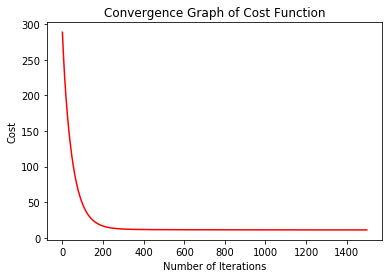

In [88]:
n_iters = 1500
learning_rate = 0.01

initial_cost = compute_cost(X, y, params)

print("Initial cost is: ", initial_cost, "\n")

(J_history, optimal_params) = gradient_descent(X, y, params, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", J_history[-1])

plt.plot(range(len(J_history)), J_history, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

<span style="font-family:Helvetica ;font-size: 14px; line-height:2.2">

There you have it! We have run the algorithm successfully as we can clearly see that the cost decreased drastically from 296 to 11. The `gradient_descent` function returned the optimal parameter values, hence, we can now use them to predict new target values. 

<span style="font-family:Helvetica ;font-size: 14px; line-height:2.2">

## Class Implementation for Linear Regression
---

Finally, after implementing linear regression from scratch we can rearrange the code we have written so far, add new code, make some modifications and turn it into a class implementation so that we have our very own linear regression package! There you go:

In [89]:
import numpy as np


class LinearRegression():
    def __init__(self, X, y, alpha=0.03, n_iter=1500):

        self.alpha = alpha
        self.n_iter = n_iter
        self.n_samples = len(y)
        self.n_features = np.size(X, 1)
        self.X = np.hstack((np.ones(
            (self.n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
        self.y = y[:, np.newaxis]
        self.params = np.zeros((self.n_features + 1, 1))
        self.coef_ = None
        self.intercept_ = None

    def fit(self):

        for i in range(self.n_iter):
            self.params = self.params - (self.alpha/self.n_samples) * \
            self.X.T @ (self.X @ self.params - self.y)

        self.intercept_ = self.params[0]
        self.coef_ = self.params[1:]

        return self

    def score(self, X=None, y=None):

        if X is None:
            X = self.X
        else:
            n_samples = np.size(X, 0)
            X = np.hstack((np.ones(
                (n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))

        if y is None:
            y = self.y
        else:
            y = y[:, np.newaxis]

        y_pred = X @ self.params
        score = 1 - (((y - y_pred)**2).sum() / ((y - y.mean())**2).sum())

        return score

    def predict(self, X):
        n_samples = np.size(X, 0)
        y = np.hstack((np.ones((n_samples, 1)), (X-np.mean(X, 0)) \
                            / np.std(X, 0))) @ self.params
        return y

    def get_params(self):

        return self.params

<span style="font-family:Helvetica ;font-size: 14px; line-height:2.2">

Do notice the similarities between our implementation and sklearn's own implemenation of linear regression. I have done it on purpose of course, to show you that we can write a simplified version of a widely used package that works in a similar way to sklearn's implementation. I also (mostly) did it for the fun of it, though!

<span style="font-family:Helvetica ;font-size: 14px; line-height:2.2">

## Comparing Our Implementation with Sklearn's Linear Regression
---

In [90]:
from sklearn.datasets import load_boston
import linear_regression as lr
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd


dataset = load_boston()

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.3, random_state=42)

our_regressor = lr.LinearRegression(X_train, y_train).fit()
sklearn_regressor = LinearRegression().fit(X_train, y_train)

our_train_accuracy = our_regressor.score()
sklearn_train_accuracy = sklearn_regressor.score(X_train, y_train)

our_test_accuracy = our_regressor.score(X_test, y_test)
sklearn_test_accuracy = sklearn_regressor.score(X_test, y_test)

df_comparison = pd.DataFrame([[our_train_accuracy, sklearn_train_accuracy],[our_test_accuracy, sklearn_test_accuracy]],
             ['Training Accuracy', 'Test Accuracy'],    
             ['Our Implementation', 'Sklearn\'s Implementation'])

print(df_comparison)


                   Our Implementation  Sklearn's Implementation
Training Accuracy            0.743482                  0.743500
Test Accuracy                0.675347                  0.711226


<span style="font-family:Helvetica ;font-size: 14px; line-height:2.2">

We have done a pretty good job with that implementation, haven't we? Our training accuracy is almost the same as the sklearn's accuracy. Also, test accuracy is not so bad comparing to the test accuracy of sklearn. 